<a href="https://colab.research.google.com/github/kyungmin0101/medical_ai/blob/main/240220/0220_gahii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
import glob
import csv
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/MedicalAI/Refractive Index Measurements New/*/*/{}*".format('W')
df_list = []
fd_list = []
cl_list = []

for file in glob.glob(path, recursive = True) :
  df = pd.read_csv(file, skiprows=24)

  df_list.append(df)
  fd_list.append(float(file.split('/')[-2]))

  if float(file.split('/')[-2]) < 1.3 :
    cl_list.append('Normal Tissue')

  elif float(file.split('/')[-2]) >= 1.3 and float(file.split('/')[-2]) <= 1.32 :
    cl_list.append('CIN-1')

  elif float(file.split('/')[-2]) >= 1.33 and float(file.split('/')[-2]) <= 1.37 :
    cl_list.append('CIN-2')

  elif float(file.split('/')[-2]) >= 1.38 and float(file.split('/')[-2]) <= 1.39 :
    cl_list.append('CIN-3')

  elif float(file.split('/')[-2]) >= 1.39 :
    cl_list.append('Cervical Cancer')

['1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.33', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.34', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.3', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.35', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.31', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.36', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.32', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.37', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.45', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.43', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.44', '1.42', '1.42', '1.42', '1.42', '1.42', '1

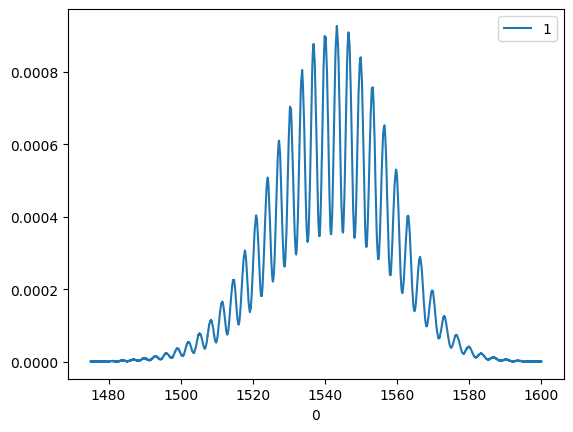

In [ ]:
df_list[0].astype(float).plot(x=0, y=1)
print(fd_list)

In [ ]:
!pip install -U scikit-learn

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# split the data
x_train, x_test, y_train, y_test = train_test_split(df_list, cl_list, test_size=0.1)
x2_train, x2_test, y2_train, y2_test = train_test_split(df_list, fd_list, test_size=0.1)

#reshape
nsamples, nx, ny = np.array(x_train).shape
d2_x_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x_test).shape
d2_x_test = np.array(x_test).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x2_train).shape
d2_x2_train = np.array(x_train).reshape((nsamples,nx*ny))

nsamples, nx, ny = np.array(x2_test).shape
d2_x2_test = np.array(x_test).reshape((nsamples,nx*ny))

#classification model
KNN = KNeighborsClassifier(n_neighbors = 3)
XGB = GradientBoostingClassifier(n_estimators=80, learning_rate=1.0, max_depth=1, random_state=0)
LDA = LinearDiscriminantAnalysis(n_components = 3)
RFC = RandomForestClassifier(max_depth=2, random_state=0)
dec = DecisionTreeClassifier(random_state = 0)
svm_model = SVC(kernel='rbf', C=1.0)
# Regression model
svm_reg = SVR(kernel='rbf', gamma='auto')
KNNR_model = KNeighborsRegressor(n_neighbors=2)
rf = RandomForestRegressor(max_depth=2, random_state=0)

#training(classification)
LDA.fit(d2_x_train, y_train)
KNN.fit(d2_x_train, y_train)
XGB.fit(d2_x_train, y_train)
RFC.fit(d2_x_train, y_train)
dec.fit(d2_x_train,y_train)
svm_model.fit(d2_x_train,y_train)

#training(regression)
svm_reg.fit(d2_x2_train,y_train)
KNNR_model.fit(d2_x2_train,y_train)
rf.fit(d2_x2_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [113]:
##predict
#classification
knn_pred = KNN.predict(d2_x_test)
lda_pred = LDA.predict(d2_x_test)
xgb_pred = XGB.predict(d2_x_test)
rfc_pred = RFC.predict(d2_x_test)
dec_pred = dec.predict(d2_x_test)
svm_pred = svm_model.predict(d2_x_test)

#regression
svm_pred = svm_reg.predict(d2_x_test)
knn_pred = KNNR_model.predict(d2_x_test)
rf_pred = rf.predict(d2_x_test)

In [116]:
# accuracy for classification
print('Classification----------------------------------')
print('KNN Acc : {}'.format(accuracy_score(y_test,knn_pred)))
print('LDA Acc : {}'.format(accuracy_score(y_test,lda_pred)))
print('XGB Acc : {}'.format(accuracy_score(y_test,xgb_pred)))
print('RFC Acc : {}'.format(accuracy_score(y_test,rfc_pred)))
print('DEC Acc : {}'.format(accuracy_score(y_test,dec_pred)))
print('SVM Acc : {}'.format(accuracy_score(y_test,svm_pred)))
# accuracy for regression
print('Regression----------------------------------')
print('Mean Squared Error')
print('SVM : {}'.format(mean_squared_error(y_test,svm_pred)))
print('knn : {}'.format(mean_squared_error(y_test,knn_pred)))
print('randf : {}'.format(mean_squared_error(y_test,rf_pred)))
print('----------------------------------')
print('r2 score')
print('svm r2 : {}'.format(r2_score(y_test,svm_pred)))
print('knn: {}'.format(r2_score(y_test,knn_pred)))
print('randf: {}'.format(r2_score(y_test,rf_pred)))

Mean Squared Error
SVM : 0.004075000000000001
knn : 0.0002447916666666666
randf : 0.00043544626986230793
----------------------------------
r2 score
svm r2 : -0.1418563922942213
knn: 0.9314068884997081
randf: 0.8779835320876195
